## Exploring fire incidents in San Francisco Dataset

At first, the dataset has to be loaded into our workspace to be able to get some initial insights about it. So let's do it. Let's use pandas for this, the file is located in our folder in .csv format.

In [2]:
import pandas as pd
df_firecalls =  pd.read_csv('fire-incidents.csv')

C:\Users\CompudidaPC\AppData\Local\Temp\ipykernel_3500\364279786.py:2: DtypeWarning: Columns (10,12,13,20,29,38,45,46,55,59) have mixed types. Specify dtype option on import or set low_memory=False.
  df_firecalls =  pd.read_csv('fire-incidents.csv')


Now, let's use the command info to get some information about the composition of the dataset and its structure.

In [3]:
df_firecalls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 538285 entries, 0 to 538284
Data columns (total 80 columns):
 #   Column                                                Non-Null Count   Dtype  
---  ------                                                --------------   -----  
 0   Incident Number                                       538285 non-null  int64  
 1   Exposure Number                                       538285 non-null  int64  
 2   ID                                                    538285 non-null  int64  
 3   Address                                               537982 non-null  object 
 4   Incident Date                                         538285 non-null  object 
 5   Call Number                                           538285 non-null  int64  
 6   Alarm DtTm                                            538285 non-null  object 
 7   Arrival DtTm                                          538245 non-null  object 
 8   Close DtTm                                  

The dataset has a total of 80 columns. For our exercise, we will only use the first 16, so let's trim our data.

In [4]:
index = list(range(0,16))
df_firecalls = df_firecalls.iloc[:,index]
df_firecalls.head(5)

,Incident Number,Exposure Number,ID,Address,Incident Date,Call Number,Alarm DtTm,Arrival DtTm,Close DtTm,City,ZIP Code,Battalion,Station Area,Box,Suppression Units,Suppression Personnel
0,20104668,0,201046680,MARIPOSA STREET,2020-09-11T00:00:00.000,202550069,2020-09-11T00:53:28.000,2020-09-11T00:58:28.000,2020-09-11T01:27:31.000,San Francisco,94107.0,B03,37,2456,2,9
1,20104708,0,201047080,355 27TH STREET,2020-09-11T00:00:00.000,202550443,2020-09-11T06:48:06.000,2020-09-11T06:49:52.000,2020-09-11T07:07:16.000,San Francisco,94131.0,B06,11,5552,3,10
2,20104648,0,201046480,2048 POLK STREET,2020-09-10T00:00:00.000,202543291,2020-09-10T22:25:43.000,2020-09-10T22:29:12.000,2020-09-10T22:33:37.000,San Francisco,94109.0,B04,41,3125,3,11
3,20104598,0,201045980,501 COLLEGE AVENUE,2020-09-10T00:00:00.000,202542828,2020-09-10T18:58:34.000,2020-09-10T19:02:32.000,2020-09-10T19:11:55.000,San Francisco,94112.0,B06,32,5642,2,5
4,20104575,0,201045750,289 9TH AVENUE,2020-09-10T00:00:00.000,202542648,2020-09-10T18:01:37.000,2020-09-10T18:04:57.000,2020-09-10T18:27:45.000,San Francisco,94118.0,B07,31,7136,3,10


Now, let's check the ocurrence of null values in our selection

In [5]:
df_firecalls.isnull().sum()

Incident Number               0
Exposure Number               0
ID                            0
Address                     303
Incident Date                 0
Call Number                   0
Alarm DtTm                    0
Arrival DtTm                 40
Close DtTm                    1
City                       1637
ZIP Code                    235
Battalion                     0
Station Area                819
Box                      297844
Suppression Units             0
Suppression Personnel         0
dtype: int64

Let's drop the 'Box' column, cause its content is practicely half null, and then let's drop the rows with empty values and recheck. Also there are some columns that don't contain much information, just identifiers, so let's get ride of them too.

In [6]:
df_firecalls.drop(['Box','Incident Number', 'Exposure Number', 'Call Number'],axis=1, inplace = True)
df_firecalls.dropna(how='any',inplace=True)
df_firecalls.isnull().sum()

ID                       0
Address                  0
Incident Date            0
Alarm DtTm               0
Arrival DtTm             0
Close DtTm               0
City                     0
ZIP Code                 0
Battalion                0
Station Area             0
Suppression Units        0
Suppression Personnel    0
dtype: int64

We will transform the columns related to time. For the 'Incident Date' column, let's transform it into a datetime datatype, and for the 'Alarm DtTm', 'Arrival DtTm' and 'Close DtTm', we will use then to get information about the 'Response time' and 'Time of extinction' of the fire.

In [7]:
from datetime import datetime
#Convert to datetime objects
df_firecalls['Incident Date']=pd.to_datetime(df_firecalls['Incident Date'], errors= 'coerce')
df_firecalls['Arrival DtTm']= pd.to_datetime(df_firecalls['Arrival DtTm'], errors= 'coerce')
df_firecalls['Alarm DtTm']=pd.to_datetime(df_firecalls['Alarm DtTm'], errors= 'coerce')
df_firecalls['Close DtTm']=pd.to_datetime(df_firecalls['Close DtTm'], errors= 'coerce')
#Create a lambda function to convert to datetime object in seconds
seconds = lambda x: x.total_seconds()
#Calculate response time and fire extinction time
delay_rt=(df_firecalls['Arrival DtTm']-df_firecalls['Alarm DtTm'])
delay_fe=(df_firecalls['Close DtTm']-df_firecalls['Arrival DtTm'])
#Save results in dataframe
df_firecalls['Response Time']= delay_rt.apply(seconds)
df_firecalls['FireEx Time'] = delay_fe.apply(seconds)
#Drop Alarm DtTm, Close DtTm and Arrival DtTm
df_firecalls.drop(['Arrival DtTm','Close DtTm', 'Alarm DtTm'],axis=1, inplace=True)

Let's begin our exploration by getting an idea of the distribution of each one of the variables(columns) we have. For this we will build a histogram for each one. Notice that we have some categorical variables, for those ones, we will use a barplot.

In [8]:
df_firecalls.dtypes

ID                                int64
Address                          object
Incident Date            datetime64[ns]
City                             object
ZIP Code                         object
Battalion                        object
Station Area                     object
Suppression Units                 int64
Suppression Personnel             int64
Response Time                   float64
FireEx Time                     float64
dtype: object

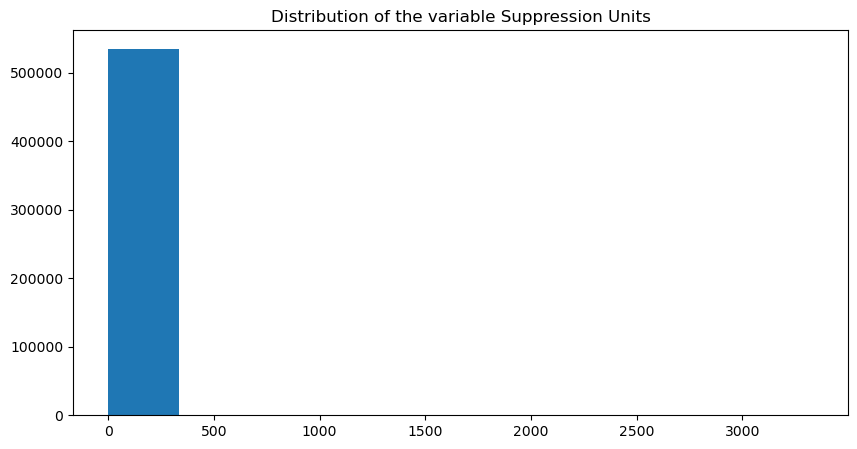

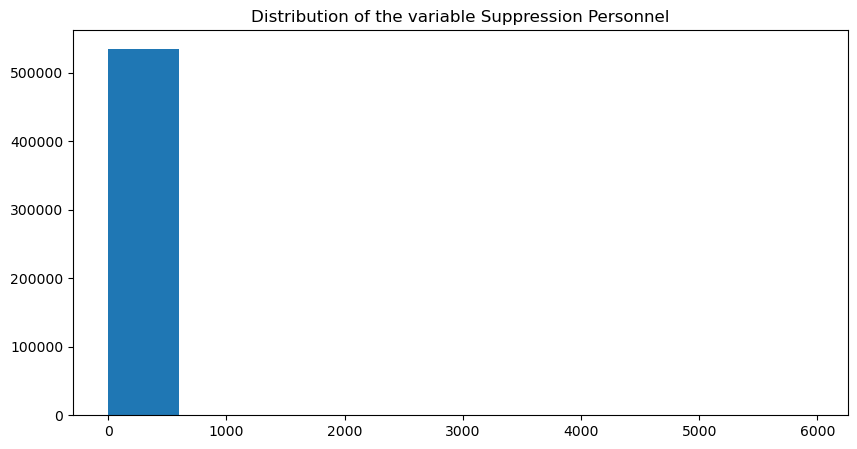

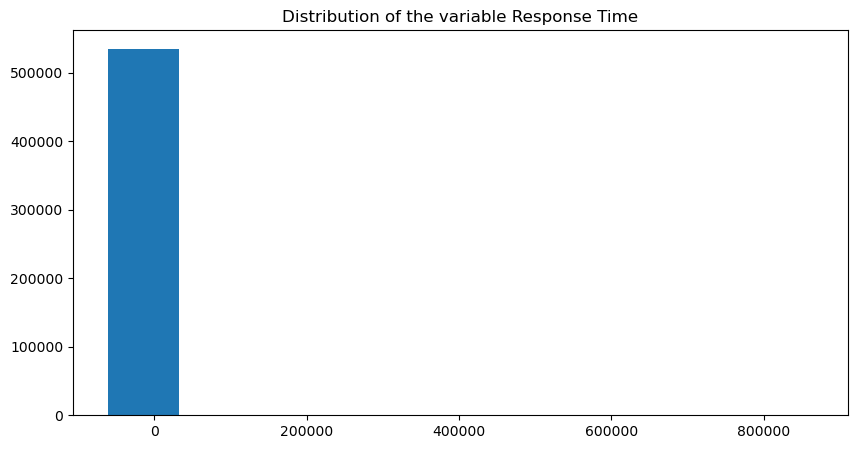

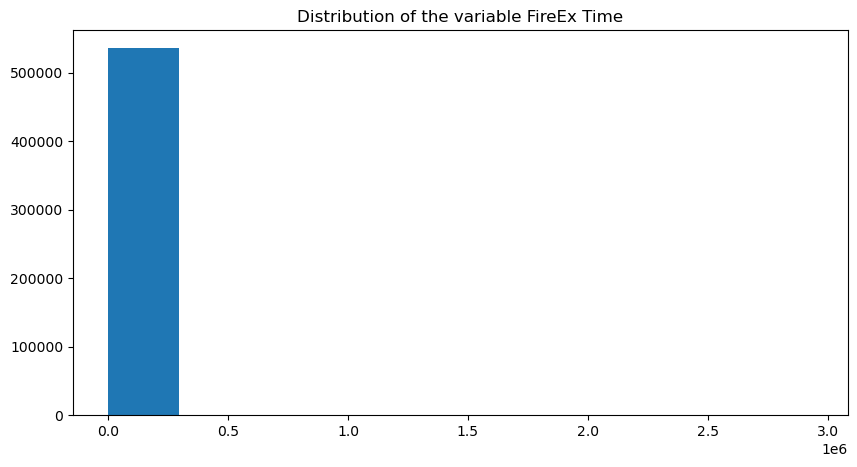

In [9]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
numeric_cols = [7,8,9,10]

def histogram(df):
    names = list(df)
    i=0
    for row in df:
        fig=plt.figure(figsize=(10,5))
        ax=fig.gca()
        ax.hist(df[row],bins=10)
        ax.set_title('Distribution of the variable {}'.format(names[i]))
        i+=1
    plt.show()

histogram(df_firecalls.iloc[:,numeric_cols])

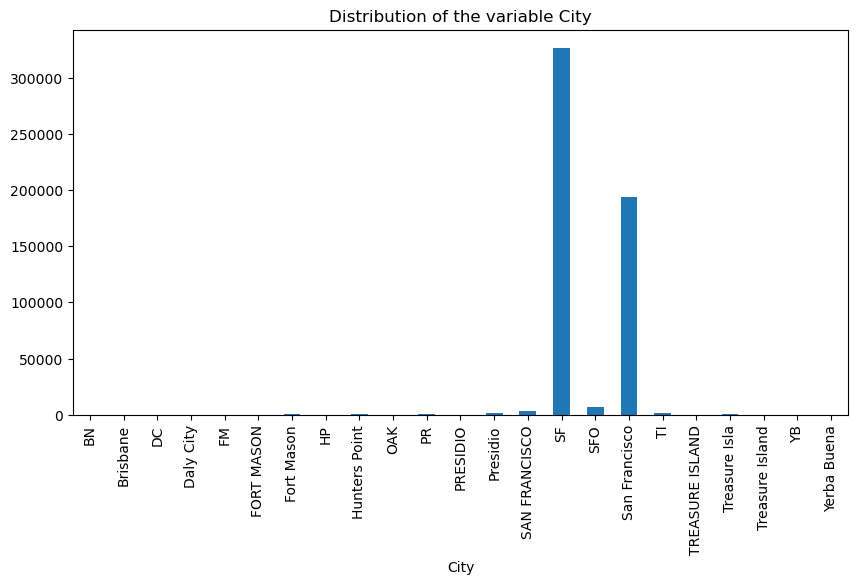

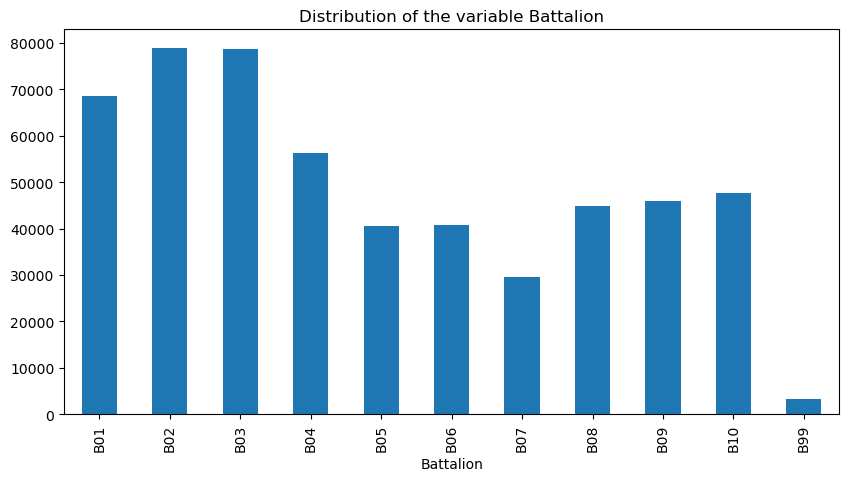

In [10]:
categorical_cols = [3,5]

def bar_plot(df):
    names = list(df)
    for name in names:
        fig=plt.figure(figsize=(10,5))
        ax=fig.gca()
        df.groupby(name).size().plot(kind='bar')
        ax.set_title('Distribution of the variable {}'.format(name))
    plt.show()

bar_plot(df_firecalls.iloc[:,categorical_cols])

As you can notice the variables Station Area and ZIP Code were not plotted, that is because they have a great number of unique values what makes difficult to get a meaning of them by visualizing them in this way.

In [11]:
print('The number of unique valures for Station Area is: ',+df_firecalls['Station Area'].value_counts().count())
print('The number of unique valures for ZIP Code is    : ',+df_firecalls['ZIP Code'].value_counts().count())

The number of unique valures for Station Area is:  97
The number of unique valures for ZIP Code is    :  102


The histograms are not what we could expect, most surely that is because of the existence of outliers. Let's check it out by doing some boxplots.

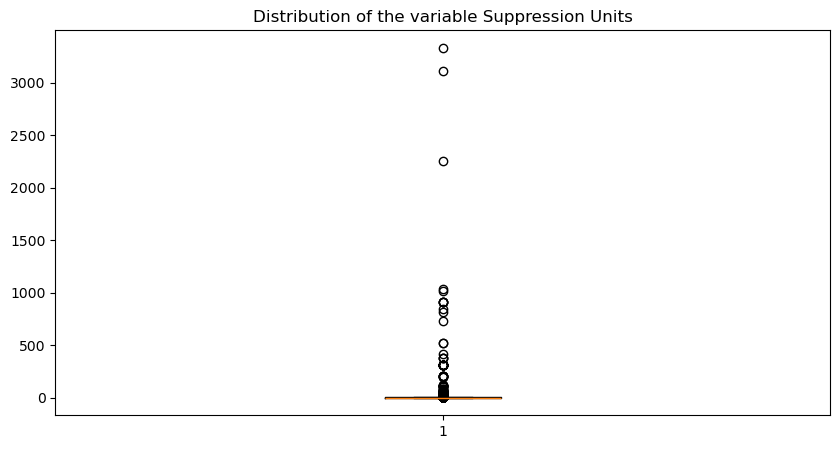

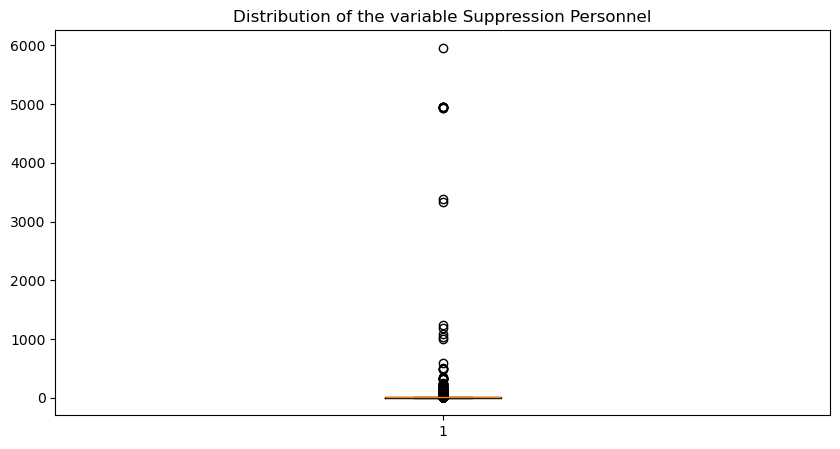

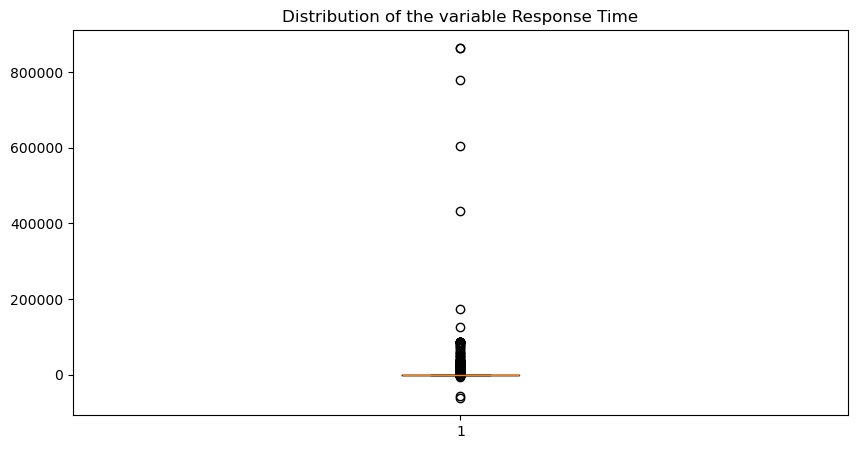

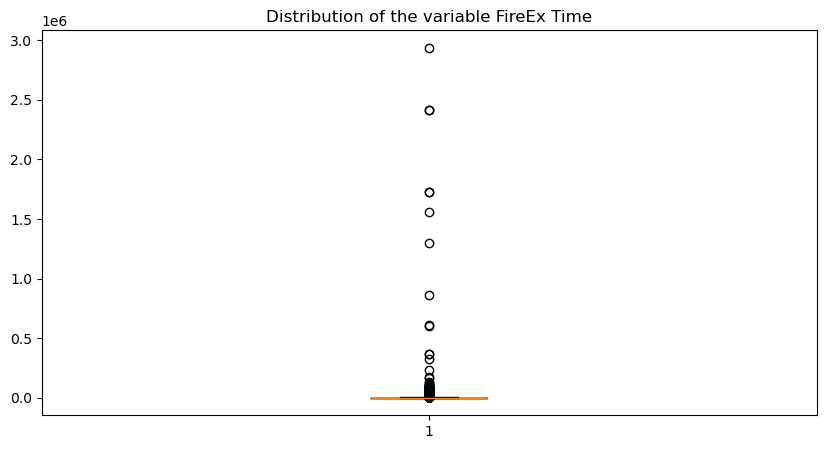

In [12]:
def box(df):
    names = list(df)
    i=0
    for row in df:
        fig=plt.figure(figsize=(10,5))
        ax=fig.gca()
        ax.boxplot(df[row])
        ax.set_title('Distribution of the variable {}'.format(names[i]))
        i+=1
    plt.show()

box(df_firecalls.iloc[:,numeric_cols])

Let's count the outliers for this set of variables:

In [13]:

#Calculating the interquartile range of each variable
cols = ['Suppression Units', 'Suppression Personnel', 'Response Time', 'FireEx Time']
q3=df_firecalls[cols].quantile(0.75)
q1=df_firecalls[cols].quantile(0.25)
iqr = q3-q1
print(iqr)
#count for every variable
print('\nThe number of rows for the complete dataset is : {}'.format(df_firecalls.shape[0]))
for col in cols:
    print('The number of outliers for the variable {} is: {}'.format(col,df_firecalls[df_firecalls[col]>q3[col]+1.5*iqr[col]].shape[0]))

Suppression Units          2.0
Suppression Personnel      6.0
Response Time            157.0
FireEx Time              971.0
dtype: float64

The number of rows for the complete dataset is : 535448
The number of outliers for the variable Suppression Units is: 31085
The number of outliers for the variable Suppression Personnel is: 31799
The number of outliers for the variable Response Time is: 26385
The number of outliers for the variable FireEx Time is: 65856


Let's get ride of the outliers and check how many data does our dataset contain after.

In [14]:
#Deleting outliers
for col in cols:
    df_firecalls= df_firecalls[df_firecalls[col]<q3[col]+1.5*iqr[col]]
#Eliminating negative values in FireEx Time variable
df_firecalls=df_firecalls[df_firecalls['FireEx Time']>0]
#Printing number of rows
print(df_firecalls.shape[0])

415953


We lost a significant amount of data, however for the purpose of the exercise let's continue like this. Let's plot the histograms once again:

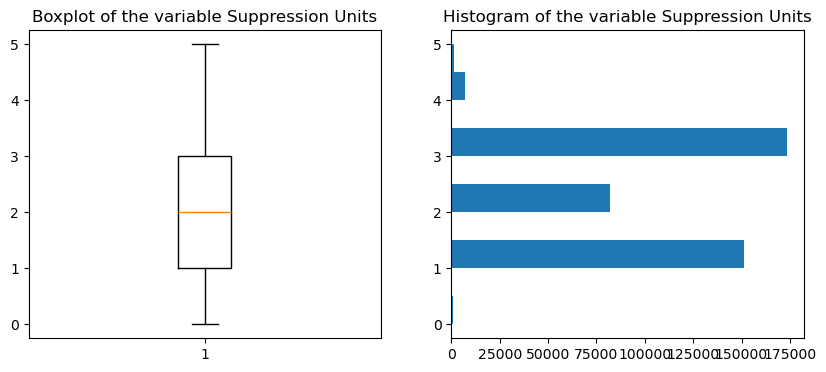

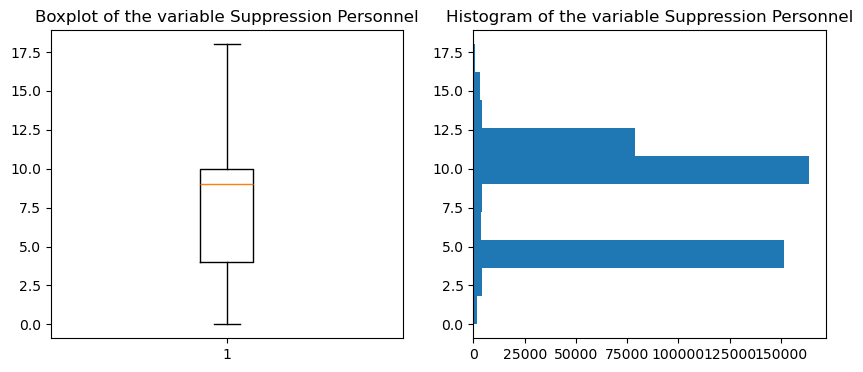

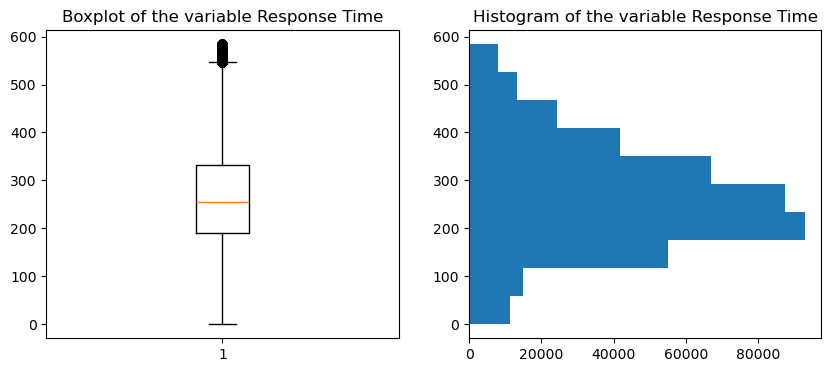

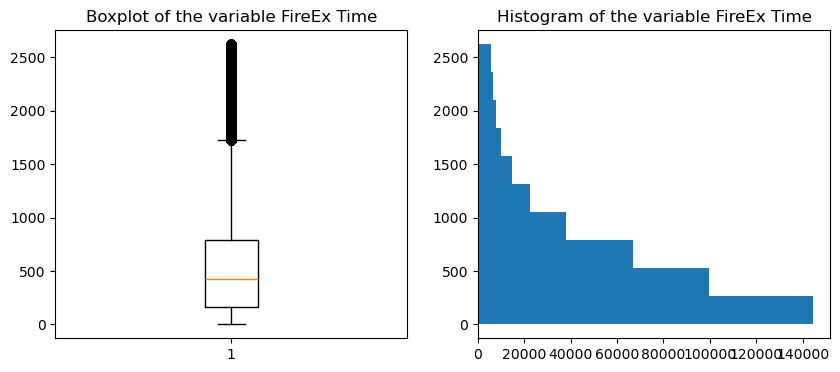

In [15]:
def combined_plot(df):
    names = list(df)
    i=0
    for row in df:
        fig, ax = plt.subplots(1, 2, figsize = (10,4))
        #Creating the boxplot
        ax[0].boxplot(df[row])
        ax[0].set_title('Boxplot of the variable {}'.format(names[i]))
        #Creating histogram in horizontal orientation
        ax[1].hist(df[row], orientation='horizontal')
        ax[1].set_title('Histogram of the variable {}'.format(names[i]))
        i+=1
    plt.show()

combined_plot(df_firecalls.iloc[:,numeric_cols])



Finally, using the describe functions we can get an idea of the  distribution of our numeric variables and compare it with the graphical results we've had

In [16]:
df_firecalls.describe()

,ID,Incident Date,Suppression Units,Suppression Personnel,Response Time,FireEx Time
count,4.159530e+05,415953,415953.000000,415953.000000,415953.000000,415953.000000
mean,1.147272e+08,2011-11-28 10:53:53.978838784,2.092852,7.852531,265.354069,573.478395
min,3.000003e+07,2003-01-01 00:00:00,0.000000,0.000000,0.000000,1.000000
25%,7.039609e+07,2007-05-18 00:00:00,1.000000,4.000000,191.000000,165.000000
50%,1.111523e+08,2011-12-13 00:00:00,2.000000,9.000000,255.000000,421.000000
75%,1.608046e+08,2016-07-22 00:00:00,3.000000,10.000000,333.000000,790.000000
max,2.010471e+08,2020-09-11 00:00:00,5.000000,18.000000,584.000000,2623.000000
std,5.218329e+07,NaN,0.935214,3.095681,110.659932,551.201178


As for our categorical variables let's validate the mode and the distinct values contained in each one

In [17]:
#Creating a function to calculate the mode and unique values
def mode(arr):
    unique_values, freq = np.unique(arr, return_counts=True)
    max_freq = np.max(freq)   
    mode_index = np.where(freq==max_freq)  
    mode = unique_values[mode_index]   
    return mode, unique_values
#Printing mode and unique values for each variable
for name, series in df_firecalls.iloc[:,categorical_cols].items():
    list_mode,unique = mode(series.values)
    print('\nFor variable {}'.format(name))
    print('The data with the most freq is = '+list_mode)
    print('Unique values:')
    print(series)


For variable City
['The data with the most freq is = SF']
Unique values:
0         San Francisco
1         San Francisco
2         San Francisco
3         San Francisco
4         San Francisco
              ...      
538278               SF
538280               SF
538281               SF
538282               SF
538284               SF
Name: City, Length: 415953, dtype: object

For variable Battalion
['The data with the most freq is = B02']
Unique values:
0         B03
1         B06
2         B04
3         B06
4         B07
         ... 
538278    B02
538280    B02
538281    B03
538282    B07
538284    B07
Name: Battalion, Length: 415953, dtype: object


In [20]:
df_firecalls.to_csv('../Regression/firecalls-sf-clean.csv', index = False)